In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

![CRISP_DM](../reports/figures/CRISP_DM.png)

In [2]:
# parse_dates will help to parse the dates right at the beginning even if the date is stored in ISO format

df_analyse = pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';',parse_dates=[0])
df_analyse.sort_values('date',ascending=True).head()

,date,Italy,India,Germany,US,Spain
0,2020-01-22,0,0,0,1,0
1,2020-01-23,0,0,0,1,0
2,2020-01-24,0,0,0,2,0
3,2020-01-25,0,0,0,2,0
4,2020-01-26,0,0,0,5,0


In [3]:
df_analyse.Germany[50]

2078

In [4]:
N0=1000000
beta = 0.4
gamma=0.1

# condition I0+S0+R0=N0
I0= df_analyse.Germany[35]
S0=N0-I0
R0=0

In [5]:
def SIR_model(SIR,beta,gamma):
    '''Simple SIR model
    dS+dI+dR = 0
    S+I+R = N (constant size of population)
    '''
    S,I,R = SIR
    dS_dt=-beta*S*I/N0
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return(dS_dt,dI_dt,dR_dt)
    

In [6]:
type(SIR)

NameError: name 'SIR' is not defined

In [ ]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

In [ ]:
type(gamma)

In [ ]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Scenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# Fitting parameters for SIR model

In [ ]:
ydata= np.array(df_analyse.Germany[35:])
t=np.arange(len(ydata))
ydata

In [ ]:
# ensure re-initialization 
I0=ydata[0]
S0=N0-I0
R0=0
beta


In [ ]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0         
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [ ]:
def fit_odeint(x, beta, gamma):
   
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] 

In [ ]:
popt=[0.9,0.1]
fit_odeint(t, *popt)

In [ ]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

In [ ]:
# get the final fitted curve
fitted=fit_odeint(t, *popt)

In [ ]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
#plt.xlim(0,40) 
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

#  Dynamic beta in SIR

In [ ]:
country_list = ['Italy',
                'India',
                'Germany',
                'US',
                'Spain']

In [12]:
country_list = ['Germany']

In [15]:
for each in country_list:
    ydata= np.array(df_analyse.each[35:])
    t=np.arange(len(ydata))

AttributeError: 'DataFrame' object has no attribute 'each'

In [11]:
t

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179])

In [ ]:
ydata= np.array(df_analyse.Germany[35:])
t=np.arange(len(ydata))

In [445]:
# ensure re-initialization 


I0=ydata[0]

N0=1000000

S0=N0-I0
R0=0
beta

0.4

In [446]:
t_initial=25
t_intro_measures=21
t_hold=21
t_relax=110

beta_max=0.4
beta_min=0.11
gamma=0.1
pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array(t_hold*[beta_min]),
                       np.linspace(beta_min,beta_max,t_relax),
                       ))


In [447]:
SIR=np.array([S0,I0,R0])

In [448]:
SIR

array([999973,     27,      0], dtype=int64)

In [449]:

propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_beta in pd_beta:
   
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)
     

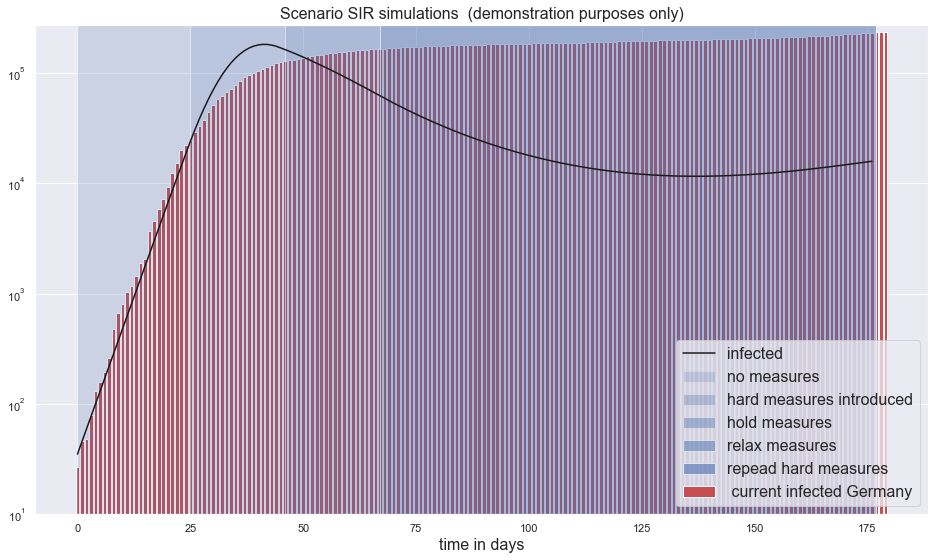

In [450]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')

t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
ax1.bar(np.arange(len(ydata)),ydata, width=0.8,label=' current infected Germany',color='r')
ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repead hard measures')


ax1.set_ylim(10, 1.5*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Scenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});